In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('student_clustering.csv')
print(f"Shape of the data is {df.shape}")
df.sample(6)

Shape of the data is (200, 2)


,cgpa,iq
58,5.87,109
49,5.67,109
119,4.98,87
118,8.97,117
111,8.86,117
62,8.65,95


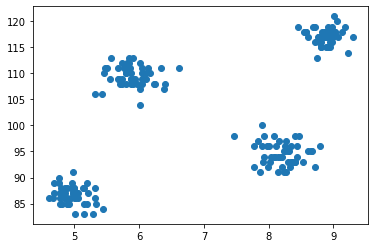

In [5]:
plt.scatter(df['cgpa'],df['iq'])

### Elbow Method

In [6]:
from sklearn.cluster import KMeans

In [9]:
#hyperparameter no. clusters.
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 514.1616803171117,
 398.4039118468834,
 295.4391895943191,
 233.54082485509016,
 206.316445212957,
 184.01537465571434]

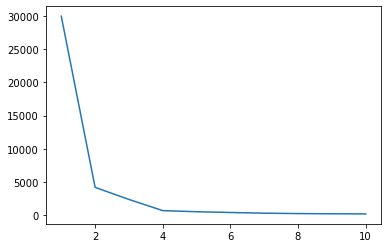

In [13]:
plt.plot(range(1,11),wcss)

In [19]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [20]:
y_means

array([0, 3, 2, 2, 3, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 0, 3, 0, 2, 2, 0,
       1, 1, 2, 3, 1, 3, 0, 0, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 1, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3,
       1, 3, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 3, 3, 2, 1, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 2, 3, 0, 2, 2, 3,
       0, 0, 3, 1, 3, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1,
       0, 2, 3, 1, 3, 2, 0, 1, 3, 2, 1, 0, 3, 0, 0, 1, 1, 3, 1, 0, 0, 2,
       1, 3, 0, 1, 1, 3, 3, 3, 2, 0, 2, 2, 1, 3, 2, 2, 0, 0, 2, 0, 1, 3,
       3, 1])

In [28]:
X[y_means == 2,0]

array([8.36, 8.27, 8.41, 8.09, 8.16, 8.31, 7.87, 7.47, 7.78, 7.93, 8.04,
       7.77, 8.  , 8.43, 8.02, 8.14, 8.12, 8.34, 8.65, 8.53, 8.29, 7.93,
       8.72, 8.14, 8.2 , 8.67, 8.18, 8.61, 7.99, 8.08, 8.26, 8.25, 8.4 ,
       7.84, 8.08, 8.25, 8.3 , 7.9 , 7.97, 8.21, 8.23, 8.35, 8.33, 8.46,
       7.89, 7.91, 8.23, 8.4 , 8.44, 8.79])

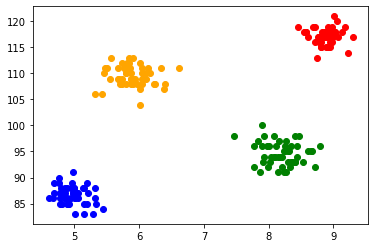

In [30]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color = 'blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color = 'green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color = 'orange')

### Kmeans on 3-D data

In [78]:
from sklearn.datasets import make_blobs

#centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4),(2,2,2)]
centroids = [(0,0,0),(0,0,0),(0,0,0),(0,0,0),(0,0,0)]
cluster_std = [1,1,1,1,0.5]

X,y = make_blobs(n_samples=400,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [79]:
X

array([[ 1.06032751, -1.71116766,  1.65712464],
       [ 1.19891788,  0.18515642, -0.37528495],
       [-1.04553425,  0.35528451,  0.75539203],
       ...,
       [ 0.37756379,  0.12182127,  1.12948391],
       [-0.74996962,  2.0546241 ,  0.05340954],
       [-0.33128317,  0.38653915, -0.85145566]])

In [80]:
y

array([3, 0, 3, 4, 2, 1, 0, 2, 1, 4, 0, 4, 1, 1, 3, 1, 3, 4, 0, 4, 2, 1,
       3, 1, 0, 0, 1, 1, 2, 2, 0, 4, 1, 4, 2, 3, 2, 4, 0, 2, 1, 1, 4, 4,
       1, 3, 0, 4, 2, 0, 4, 1, 3, 3, 2, 4, 2, 0, 4, 4, 3, 2, 3, 2, 1, 3,
       0, 2, 2, 1, 2, 4, 3, 0, 3, 1, 3, 3, 1, 2, 1, 0, 4, 1, 4, 3, 1, 3,
       4, 4, 3, 0, 3, 0, 3, 3, 0, 4, 4, 2, 0, 0, 4, 3, 0, 4, 3, 1, 0, 2,
       0, 1, 0, 0, 4, 2, 1, 3, 0, 3, 3, 4, 0, 2, 2, 2, 4, 2, 3, 0, 4, 1,
       4, 1, 4, 2, 2, 4, 4, 0, 0, 2, 1, 4, 4, 4, 1, 2, 1, 3, 3, 3, 0, 3,
       0, 4, 2, 2, 3, 0, 3, 0, 3, 1, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 4, 1, 2, 4, 4, 1, 4, 4, 0, 0, 0,
       2, 1, 1, 0, 1, 2, 1, 2, 1, 3, 0, 2, 0, 4, 1, 3, 4, 4, 3, 3, 1, 3,
       3, 4, 1, 0, 3, 4, 1, 3, 0, 4, 1, 4, 2, 3, 4, 2, 2, 0, 3, 0, 3, 4,
       0, 4, 0, 3, 3, 3, 1, 1, 2, 1, 3, 3, 1, 2, 4, 1, 1, 2, 0, 3, 3, 2,
       2, 4, 4, 0, 0, 2, 0, 2, 3, 3, 3, 2, 1, 0, 1, 3, 2, 4, 4, 1, 3, 2,
       2, 3, 4, 0, 3, 3, 2, 2, 0, 1, 4, 4, 2, 3, 4,

In [81]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [82]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



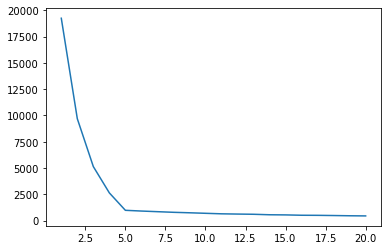

In [83]:
plt.plot(range(1,21),wcss)

In [84]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X)

In [85]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [86]:
df

,col1,col2,col3,label
0,1.060328,-1.711168,1.657125,2
1,1.198918,0.185156,-0.375285,0
2,-1.045534,0.355285,0.755392,4
3,-0.099970,0.003694,0.137832,4
4,1.013822,-2.227113,-1.699334,2
...,...,...,...,...
395,0.870970,-0.508457,0.777419,0
396,-0.310626,0.525307,0.229891,1
397,0.377564,0.121821,1.129484,0
398,-0.749970,2.054624,0.053410,1


In [87]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()